# astrolib Documentation

I decided to create a library from the codes that I use for myself. I hope it will be useful for you too.

And here are our dependencies for this library:

* [Astropy](https://astropy.readthedocs.io/en/stable/)
* [astrometry.net](http://astrometry.net)
* [numpy](http://numpy.org)
* [sep](https://sep.readthedocs.io/en/v1.0.x/)
* [matplotlib](http://matplotlib.org)
* [astroquery](http://astroquery.readthedocs.io/en/latest/)

# Structure of Module



# Examples

Here I created help documentation for the commands I use the frequently. You can work the same way for others. You can find detailed help in the code.

## Detecting Sources

In [33]:
%load_ext autoreload
%autoreload 2
from astrolib import astronomy

fo = astronomy.FitsOps("108hecuba-001_R_affineremap.fits")
ds= fo.detect_sources(skycoords=True, max_sources=10)
print(ds)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


10 objects detected.
    thresh    npix tnpix xmin xmax ... ypeak flag    ra_calc       dec_calc   
------------- ---- ----- ---- ---- ... ----- ---- ------------- --------------
19.1716499329  514   482  770  798 ...   709    0 306.771497336 -23.4704661458
19.1716499329  406   375  491  512 ...   328    0 306.824877954  -23.396690687
19.1716499329  288   275  254  274 ...   447    1 306.874213526 -23.4164391737
19.1716499329  277   256  424  442 ...   380    0 306.839362608  -23.405562815
19.1716499329  198   181  424  440 ...   906    0 306.845308447 -23.5039523172
19.1716499329  194   176  979  994 ...   732    0  306.73060855 -23.4768569137
19.1716499329  191   179  421  436 ...   502    0 306.841689712 -23.4283372785
19.1716499329  186   172  748  763 ...   535    0 306.775505562 -23.4377531371
19.1716499329  217   195  968  983 ...   851    0 306.734126873 -23.4989537639
19.1716499329  146   133  304  317 ...   898    0 306.869815661 -23.5011624192


If you just want to get physical coordinates of sources;

In [2]:
print(ds['x', 'y'])

      x             y      
------------- -------------
784.445069846 708.599934474
501.969623282 328.856251826
265.640606005  447.07089538
433.446658084  379.95420757
432.153302841 906.369369574
 986.64280869 732.173102742
428.481743905  502.05257089
755.619674466  535.11980348
975.565085076 850.958300649
 311.27460779 897.879261611


## Plot detected sources
If you want to plot detected objects on the FITS file;

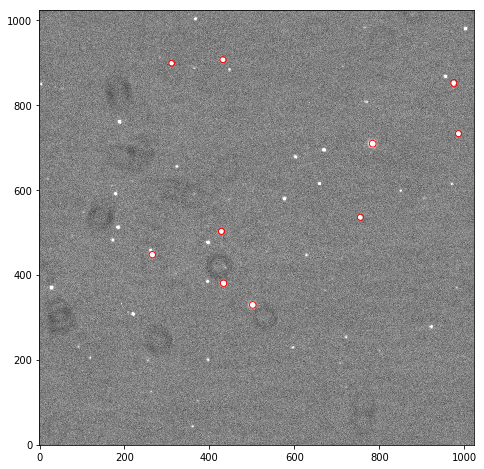

10 objects detected.


thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
19.1716499329,514,482,770,798,696,721,784.445069846,708.599934474,7.13037778034,7.14998870343,-0.212358140872,7.09243459217e-06,6.17207043114e-06,-1.98509663699e-07,2.71159863472,2.63203310966,-0.808468878269,0.140369191766,0.139984190464,0.00833806581795,723850.0,724231.8125,17705.0605469,18033.3535156,785,709,784,709,0
19.1716499329,406,375,491,512,318,340,501.969623282,328.856251826,6.85129620045,6.80527345789,-0.232098936969,1.135928646e-05,1.08330602851e-05,1.04181566067e-06,2.65735244751,2.56808257103,-0.735987305641,0.146126613021,0.14711484313,0.00996751524508,443818.09375,444089.75,13129.0449219,14977.5058594,502,329,502,328,0
19.1716499329,288,275,254,274,438,457,265.640606005,447.07089538,6.23960234427,6.07421432435,-0.279671671578,3.41360150936e-05,3.11016713517e-05,-2.11652827665e-06,2.53939938545,2.4218313694,-0.641652643681,0.160598054528,0.164970800281,0.0147886537015,185113.59375,185279.53125,6102.23291016,7160.66992188,266,447,266,447,1
19.1716499329,277,256,424,442,371,389,433.446658084,379.95420757,6.35316222658,6.31800704473,-0.299843333379,4.85704037652e-05,4.50648124042e-05,-1.72250253383e-06,2.57603240013,2.45666980743,-0.756120383739,0.157755285501,0.158633068204,0.0149736674502,146899.203125,147146.46875,4537.37988281,5280.50488281,434,380,434,380,0
19.1716499329,198,181,424,440,899,914,432.153302841,906.369369574,5.90303042003,5.47633612435,-0.184753256665,0.000164622405043,0.000146496989951,-3.67874889536e-06,2.44374871254,2.32539439201,-0.356847733259,0.169583573937,0.182796850801,0.0114423651248,57640.0429688,57828.2695312,1876.25524902,2155.50537109,432,906,432,906,0
19.1716499329,194,176,979,994,725,740,986.64280869,732.173102742,5.8286040971,5.77761345379,-0.123682777674,0.000149828861925,0.000146736762267,-1.92272602728e-06,2.43503427505,2.38260889053,-0.683754503727,0.171645641327,0.173160508275,0.00734891975299,57640.6875,57787.3632812,1833.14978027,2154.9621582,987,732,987,732,0
19.1716499329,191,179,421,436,494,509,428.481743905,502.05257089,5.73049328878,5.83927472126,-0.08271646368,0.000185882394818,0.000196906906581,6.81651164286e-06,2.42567110062,2.38450980186,-1.07623255253,0.174540728331,0.171289175749,0.00494492659345,49968.703125,50177.390625,1583.44250488,1840.37927246,429,502,429,502,0
19.1716499329,186,172,748,763,528,543,755.619674466,535.11980348,5.84952315959,5.86444076657,-0.302552966408,0.000190548947294,0.000193111256106,-1.3837525619e-05,2.48185944557,2.35676407814,-0.797722101212,0.171411499381,0.170975476503,0.0176866166294,48653.1601562,48840.03125,1514.21801758,1737.78015137,756,535,756,535,0
19.1716499329,217,195,968,983,837,859,975.565085076,850.958300649,5.45041439198,8.61544221634,-0.369553518093,0.000244768135719,0.000640536321842,-2.73328688175e-05,2.94245123863,2.32547569275,-1.45609033108,0.184007450938,0.116409212351,0.015785748139,41191.078125,41409.0390625,1270.40551758,1463.90539551,976,851,976,851,0


In [34]:
fo.detect_sources(plot=True, max_sources=10)

## Query and match detected objects with the GAIA DR1

In [42]:
from astrolib import catalog
q = catalog.Query()
q.gaia_query(306.77168051, -23.47029011, 0.1, max_sources=5)

Source,RA_ICRS,DE_ICRS,e_RA_ICRS,e_DE_ICRS,__Gmag_,pmRA,pmDE,e_pmRA,e_pmDE,Epoch,Plx
,deg,deg,mas,mas,mag,mas / yr,mas / yr,mas / yr,mas / yr,yr,mas
int64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32
6849534850623923456,306.7733664604,-23.5149644759,0.262,0.221,17.121,--,--,--,--,2015.0,--
6849534850623925120,306.7712467689,-23.5125792734,0.870,0.749,19.499,--,--,--,--,2015.0,--
6849534988062874624,306.7217934709,-23.5187662526,0.690,0.589,19.120,--,--,--,--,2015.0,--
6849534988062875264,306.7263979238,-23.5181699239,0.325,0.264,17.535,--,--,--,--,2015.0,--
6849535056782354560,306.7183059223,-23.5126694863,0.196,0.133,17.308,--,--,--,--,2015.0,--


If you just want to query the target object, reduce the radius like;

In [43]:
from astrolib import catalog
q = catalog.Query()
q.gaia_query(306.77168051, -23.47029011, 0.01, max_sources=5)

Source,RA_ICRS,DE_ICRS,e_RA_ICRS,e_DE_ICRS,__Gmag_,pmRA,pmDE,e_pmRA,e_pmDE,Epoch,Plx
,deg,deg,mas,mas,mag,mas / yr,mas / yr,mas / yr,mas / yr,yr,mas
int64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32
6849629099386034304,306.7717090460,-23.4702787742,0.216,0.126,9.603,8.059,4.816,0.910,0.619,2015.0,3.17


## Matching with GAIA DR1

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


10 objects detected.


/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


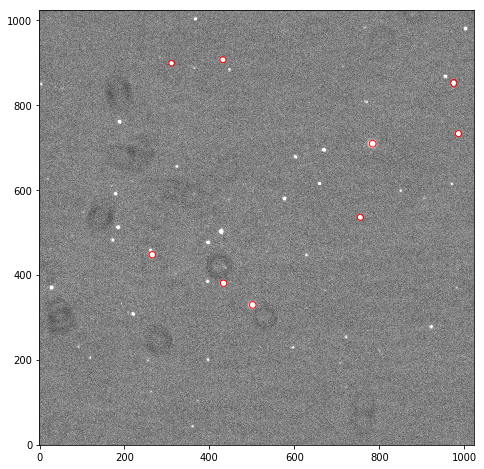

Matched objects: 9


id,x,y,ra,dec,e_ra,e_dec,g_mean_mag,pmra,pmdec,e_pmra,e_pmdec,epoch,plx,flux,a,b,theta,ra_calc,dec_calc,ra_diff,dec_diff
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6.84962909939e+18,784.445069846,708.599934474,306.771709046,-23.4702787742,0.216000005603,0.126000002027,9.60299968719,8.059,4.816,0.910000026226,0.619000017643,2015.0,3.17000007629,724231.8125,2.71159863472,2.63203310966,-0.808468878269,306.771497336,-23.4704661458,762.154325162,674.53790621
6.84964298072e+18,501.969623282,328.856251826,306.825119424,-23.3966105431,0.155000001192,0.0960000008345,10.1719999313,nan,nan,nan,nan,2015.0,nan,444089.75,2.65735244751,2.56808257103,-0.735987305641,306.824877954,-23.396690687,869.293691494,288.518125998
6.84963092045e+18,265.640606005,447.07089538,306.874457724,-23.4164026349,0.34999999404,0.171000003815,11.0909996033,19.918,-7.057,1.93099999428,1.28299999237,2015.0,3.65000009537,185279.53125,2.53939938545,2.4218313694,-0.641652643681,306.874213526,-23.4164391737,879.11293615,131.539743526
6.84963122969e+18,433.446658084,379.95420757,306.839605839,-23.4054917128,0.195999994874,0.140000000596,11.3380002975,-1.037,-1.896,1.43299996853,0.952000021935,2015.0,0.579999983311,147146.46875,2.57603240013,2.45666980743,-0.756120383739,306.839362608,-23.405562815,875.629978918,255.967955209
6.84962782808e+18,432.153302841,906.369369574,306.845545923,-23.5038156954,0.231999993324,0.163000002503,12.3310003281,-6.099,-11.584,1.67200005054,1.0909999609,2015.0,1.14999997616,57828.2695312,2.44374871254,2.32539439201,-0.356847733259,306.845308447,-23.5039523172,854.913985108,491.838601999
6.84954694525e+18,986.64280869,732.173102742,306.730808533,-23.4766263796,0.152999997139,0.119999997318,12.3090000153,nan,nan,nan,nan,2015.0,nan,57787.3632812,2.43503427505,2.38260889053,-0.683754503727,306.73060855,-23.4768569137,719.935376696,829.922643453
6.8496409535e+18,755.619674466,535.11980348,306.775712653,-23.4375940654,0.097000002861,0.0750000029802,12.5030002594,nan,nan,nan,nan,2015.0,nan,48840.03125,2.48185944557,2.35676407814,-0.797722101212,306.775505562,-23.4377531371,745.527969957,572.658003705
6.84953515986e+18,975.565085076,850.958300649,306.734327716,-23.4987547309,0.104999996722,0.082000002265,12.7259998322,nan,nan,nan,nan,2015.0,nan,41409.0390625,2.94245123863,2.32547569275,-1.45609033108,306.734126873,-23.4989537639,723.032314954,716.51890772
6.84962820603e+18,311.27460779,897.879261611,306.870049861,-23.5010591944,0.109999999404,0.0729999989271,12.875,nan,nan,nan,nan,2015.0,nan,32735.9355469,2.27406144142,2.18840885162,-0.852674245834,306.869815661,-23.5011624192,843.118385296,371.609451281


In [51]:
q.match_catalog("108hecuba-001_R_affineremap.fits", plot=True, max_sources=10)

# Astrometry with IRAF's ccmap

First of all we need a FITS file that has been resolved with astrometry.net (For example: 108hecuba-001_R_affineremap.fits). Then our code will map the resources found here to the GAIA catalog and again perform astrometry with these coordinates via [ccmap](http://stsdas.stsci.edu/cgi-bin/gethelp.cgi?ccmap).

In [59]:
from astrolib import catalog
from astrolib import astronomy


q = catalog.Query()
# Resolved image with Astrometry.net (108hecuba-001_R_affineremap.fits).
objects_matrix = q.match_catalog("108hecuba-001_R_affineremap.fits", max_sources=20)

ac = astronomy.AstCalc()
# Image with no WCS header keywords (108hecuba-001_R.fits).
ac.ccmap(objects_matrix, "./108hecuba-001_R.fits", ppm_parallax_cor=False)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


20 objects detected.


/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Matched objects: 19
Refsystem: icrs  Coordinates: equatorial ICRS
    Equinox: J2000.000 Epoch: J2000.00000000 MJD: 51544.50000
Insystem: icrs  Coordinates: equatorial ICRS
    Equinox: J2000.000 Epoch: J2000.00000000 MJD: 51544.50000

Coords File: /Users/ykilic/Documents/playground/coords  Image: ./108hecuba-001_R.fits
    Database: /Users/ykilic/Documents/playground/solutions.txt  Solution: ./108hecuba-001_R.fits
Coordinate mapping status
    XI fit ok.  ETA fit ok.
    Ra/Dec or Long/Lat fit rms: 0.038  0.0485   (arcsec  arcsec)
Coordinate mapping parameters
    Sky projection geometry: tan
    Reference point: 20:27:17.965  -23:27:09.36  (hours  degrees)
    Reference point: 519.031  627.677  (pixels  pixels)
    X and Y scale: 0.673  0.673  (arcsec/pixel  arcsec/pixel)
    X and Y axis rotation: 177.025  176.983  (degrees  degrees)
Wcs mapping status
    Ra/Dec or Long/Lat wcs rms: 0.038  0.0485   (arcsec  arcsec)
Updating image header wcs



Ra/Dec or Long/Lat fit rms,Ra/Dec or Long/Lat wcs rms,"Reference point (RA, DEC)","Reference point (X, Y)",X and Y scale,X and Y axis rotation
str16,str16,str16,str16,str28,str18
0.038,0.038,20:27:17.965,519.031,0.673,177.025
0.0485,0.0485,-23:27:09.36,627.677,0.673,176.983
(arcsec arcsec),(arcsec arcsec),(hours degrees),(pixels pixels),(arcsec/pixel arcsec/pixel),(degrees degrees)


You can see the results coordinates with;

In [60]:
ac.ccmap(objects_matrix, "./108hecuba-001_R.fits", ppm_parallax_cor=False, stdout=True)

Refsystem: icrs  Coordinates: equatorial ICRS
    Equinox: J2000.000 Epoch: J2000.00000000 MJD: 51544.50000
Insystem: icrs  Coordinates: equatorial ICRS
    Equinox: J2000.000 Epoch: J2000.00000000 MJD: 51544.50000

Coords File: /Users/ykilic/Documents/playground/coords  Image: ./108hecuba-001_R.fits
    Database: /Users/ykilic/Documents/playground/solutions.txt  Solution: ./108hecuba-001_R.fits
Coordinate mapping status
    XI fit ok.  ETA fit ok.
    Ra/Dec or Long/Lat fit rms: 0.038  0.0485   (arcsec  arcsec)
Coordinate mapping parameters
    Sky projection geometry: tan
    Reference point: 20:27:17.965  -23:27:09.36  (hours  degrees)
    Reference point: 519.031  627.677  (pixels  pixels)
    X and Y scale: 0.673  0.673  (arcsec/pixel  arcsec/pixel)
    X and Y axis rotation: 177.025  176.983  (degrees  degrees)
Wcs mapping status
    Ra/Dec or Long/Lat wcs rms: 0.038  0.0485   (arcsec  arcsec)
Updating image header wcs

# Refsystem: icrs  Coordinates: equatorial ICRS
#     Equino

Ra/Dec or Long/Lat fit rms,Ra/Dec or Long/Lat wcs rms,"Reference point (RA, DEC)","Reference point (X, Y)",X and Y scale,X and Y axis rotation
str16,str16,str16,str16,str28,str18
0.038,0.038,20:27:17.965,519.031,0.673,177.025
0.0485,0.0485,-23:27:09.36,627.677,0.673,176.983
(arcsec arcsec),(arcsec arcsec),(hours degrees),(pixels pixels),(arcsec/pixel arcsec/pixel),(degrees degrees)


But this solution does not include parallax and proper motion correction. To include these corrections;

In [61]:
ac.ccmap(objects_matrix, "./108hecuba-001_R.fits", ppm_parallax_cor=True)

Refsystem: icrs  Coordinates: equatorial ICRS
    Equinox: J2000.000 Epoch: J2000.00000000 MJD: 51544.50000
Insystem: icrs  Coordinates: equatorial ICRS
    Equinox: J2000.000 Epoch: J2000.00000000 MJD: 51544.50000

Coords File: /Users/ykilic/Documents/playground/coords  Image: ./108hecuba-001_R.fits
    Database: /Users/ykilic/Documents/playground/solutions.txt  Solution: ./108hecuba-001_R.fits
Coordinate mapping status
    XI fit ok.  ETA fit ok.
    Ra/Dec or Long/Lat fit rms: 0.0377  0.0486   (arcsec  arcsec)
Coordinate mapping parameters
    Sky projection geometry: tan
    Reference point: 20:27:17.965  -23:27:09.36  (hours  degrees)
    Reference point: 519.031  627.677  (pixels  pixels)
    X and Y scale: 0.673  0.673  (arcsec/pixel  arcsec/pixel)
    X and Y axis rotation: 177.025  176.983  (degrees  degrees)
Wcs mapping status
    Ra/Dec or Long/Lat wcs rms: 0.0377  0.0486   (arcsec  arcsec)
Updating image header wcs



Ra/Dec or Long/Lat fit rms,Ra/Dec or Long/Lat wcs rms,"Reference point (RA, DEC)","Reference point (X, Y)",X and Y scale,X and Y axis rotation
str16,str16,str16,str16,str28,str18
0.0377,0.0377,20:27:17.965,519.031,0.673,177.025
0.0486,0.0486,-23:27:09.36,627.677,0.673,176.983
(arcsec arcsec),(arcsec arcsec),(hours degrees),(pixels pixels),(arcsec/pixel arcsec/pixel),(degrees degrees)


### Proper motion correction;

Coordinates α and δ of a star in a fixed reference system change with time proportional to its proper motion μα and μδ. Let α0 and δ0 be its position at some time origin; its values at time t are;

μα = μα∗ / cosδ0

α = α0 + tμα

δ = δ0 + tμδ

### Stellar Parallax Correction;

Deltaα = π (x sin α − y cos α) / cos δ

Deltaδ = π [(x cos α + y sin α) sin δ − z cos δ]

where the coordinates x, y, z of the Earth are expressed in astronomical units and the corrections to the position are in arcseconds.

*Ref: Kovalevsky, J., & Seidelmann, P. (2004). Fundamentals of Astrometry. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139106832*



